In [1]:
from plots.mpltoolkit import mpl_loc, named_colors, markers, fancy_legend, load_mpl_presets
from scipy.stats import bootstrap, skewnorm, linregress
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np
import warnings
import random
import vice
import sys
load_mpl_presets()
# warnings.filterwarnings("ignore")
print(sys.version_info)

sys.version_info(major=3, minor=10, micro=2, releaselevel='final', serial=0)


/Users/astrobeard/Work/Research/VICErepos/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [2]:
columns = ["LINE", "APOGEE_ID", "RA", "DEC", "GALR", "GALPHI", "GALZ", "SNREV", "TEFF", "TEFF_ERR",
    "LOGG", "LOGG_ERR", "FE_H", "FE_H_ERR", "O_FE", "O_FE_ERR", "ASTRONN_AGE", "ASTRONN_AGE_ERR",
    "LATENT_AGE", "LATENT_AGE_ERR"]
raw = np.genfromtxt("../data/Leung2023.csv", delimiter = ',', skip_header = 1, usecols = range(len(columns)))
sample = {}
for i in range(len(columns)):
    sample[columns[i]] = [row[i] for row in raw]
sample["o_h"] = [a + b for a, b in zip(sample["O_FE"], sample["FE_H"])]
sample["o_h_err"] = [np.sqrt(a**2 + b**2) for a, b in zip(sample["O_FE_ERR"], sample["FE_H_ERR"])]
sample["absz"] = [abs(_) for _ in sample["GALZ"]]
sample = vice.dataframe(sample)
print(sample)

vice.dataframe{
    line -----------> [0, 1, 2, ... , 192917, 192918, 192919]
    apogee_id ------> [nan, nan, nan, ... , nan, nan, nan]
    ra -------------> [0.00285, 0.005558, 0.008802, ... , 359.993, 359.995, 359.997]
    dec ------------> [57.1732, 57.3545, 63.4631, ... , 57.0124, 57.435, 56.1633]
    galr -----------> [8.4584, 11.9539, 12.8583, ... , 10.6942, 9.3281, 9.64501]
    galphi ---------> [175.658, 153.655, 151.397, ... , 159.022, 167.511, 165.095]
    galz -----------> [-0.040749, -0.470835, 0.169356, ... , -0.358826, -0.163006, -0.265258]
    snrev ----------> [282.746, 120.295, 169.02, ... , 101.537, 232.918, 88.4561]
    teff -----------> [5031.26, 4974.6, 4681.46, ... , 4954.17, 4859.91, 4585.41]
    teff_err -------> [10.1451, 15.3109, 8.76634, ... , 15.7503, 9.05073, 11.2989]
    logg -----------> [3.45613, 2.38825, 2.24553, ... , 2.47466, 2.48069, 2.57144]
    logg_err -------> [0.0235541, 0.0355173, 0.0243345, ... , 0.0347484, 0.0240131, 0.0286862]
    fe_h ----

In [24]:
class line:
    
    def __init__(self, slope, intercept):
        self.slope = slope
        self.intercept = intercept
        
    def __call__(self, x):
        return self.slope * x + self.intercept

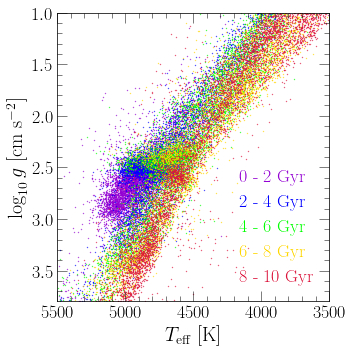

In [15]:
N_SAMPLE = 5000
random.seed(a = 1)

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111)
ax.set_xlabel(r"$T_\text{eff}$ [K]")
ax.set_ylabel(r"$\log_{10} g$ [cm s$^{-2}$]")
ax.set_xlim([3500, 5500])
ax.set_ylim([1, 3.8])
ax.invert_xaxis()
ax.invert_yaxis()


age_bins = [0, 2, 4, 6, 8, 10]
colors = ["darkviolet", "blue", "lime", "gold", "crimson"]
for i in range(len(colors)):
    subsample = sample.filter(
        "ASTRONN_AGE", ">=", age_bins[i]).filter(
        "ASTRONN_AGE", "<=", age_bins[i + 1]).filter(
        "ABSZ", ">=", 0).filter(
        "ABSZ", "<=", 0.5)
    indices = random.sample(range(len(subsample["TEFF"])), N_SAMPLE)
    kwargs = {
        "c": named_colors()[colors[i]],
        "s": 0.1,
        "rasterized": True,
        "label": "%d - %d Gyr" % (age_bins[i], age_bins[i + 1])
    }
    teff = [subsample["TEFF"][idx] for idx in indices]
    logg = [subsample["LOGG"][idx] for idx in indices]
    ax.scatter(teff, logg, **kwargs)

# kwargs = {
#     "c": named_colors()["black"],
#     "linestyle": "--"
# }
# ax.plot([4250, ax.get_xlim()[0]], 2 * [2.5], **kwargs)
# ax.plot([4250, ax.get_xlim()[0]], 2 * [3.6], **kwargs)
    
kwargs = {
    "loc": mpl_loc("lower right"),
    "ncol": 1,
    "handlelength": 0
}
leg = ax.legend(**kwargs)
fancy_legend(leg, colors)

plt.tight_layout()
plt.savefig("../paper/figures/kiel_diagram.pdf")
plt.show()

x = 12.00     
x = 1.00      
x = 1.00      
x = 12.00     
x = 1.00      
x = 1.00      
x = 12.00     
x = 1.00      
x = 1.00      
x = 12.00     
x = 1.00      
x = 1.00      
x = 12.00     
x = 1.00      
x = 1.00      
x = 12.00     
x = 1.00      
x = 1.00      


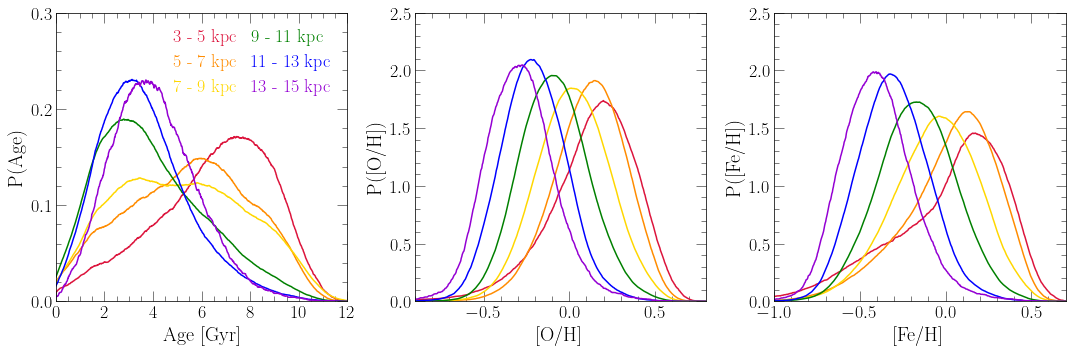

In [6]:
fig = plt.figure(figsize = (15, 5))
axes = []
for i in range(3):
    axes.append(fig.add_subplot(131 + i))
axes[0].set_xlabel(r"Age [Gyr]")
axes[0].set_ylabel(r"P(Age)")
axes[0].set_xlim([0, 12])
axes[0].set_xticks([0, 2, 4, 6, 8, 10, 12])
axes[0].set_ylim([0, 0.3])
axes[0].set_yticks([0, 0.1, 0.2, 0.3])
axes[1].set_xlabel(r"[O/H]")
axes[1].set_ylabel(r"P([O/H])")
axes[1].set_xlim([-0.9, 0.8])
axes[1].set_ylim([0, 2.5])
axes[2].set_xlabel(r"[Fe/H]")
axes[2].set_ylabel(r"P([Fe/H])")
axes[2].set_xlim([-1, 0.7])
axes[2].set_ylim([0, 2.5])

radial_bins = [3, 5, 7, 9, 11, 13, 15]
colors = ["crimson", "darkorange", "gold", "green", "blue", "darkviolet"]

# age_bins = np.linspace(0, 11, 40)
# xh_bins = np.linspace(-2, 1, 100)
age_vals = np.linspace(0, 12, 1000)
xh_vals = np.linspace(-2, 1, 1000)

def boxcarsmoothdist(data, xcoords, window):
    yvals = len(xcoords) * [0.]
    for i in range(len(xcoords)):
        sys.stdout.write("\rx = %.2f     " % (xcoords[i]))
        for j in range(len(data)):
            if xcoords[i] - window <= data[j] <= xcoords[i] + window: yvals[i] += 1
    sys.stdout.write("\n")
    norm = sum(yvals) * (xcoords[1] - xcoords[0])
    for i in range(len(yvals)): yvals[i] /= norm
#     for i in range(len(yvals)): yvals[i] /= window
    return yvals

for i in range(len(radial_bins) - 1):
    subsample = sample.filter(
        "GALR", ">=", radial_bins[i]).filter(
        "GALR", "<=", radial_bins[i + 1]).filter(
        "ABSZ", ">=", 0).filter(
        "ABSZ", "<=", 0.5)
    
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": "%d - %d kpc" % (radial_bins[i], radial_bins[i + 1])
    }

    dist = boxcarsmoothdist(subsample["ASTRONN_AGE"], age_vals, 1)
    axes[0].plot(age_vals, dist, **kwargs)
    
    dist = boxcarsmoothdist(subsample["O_H"], xh_vals, 0.2)
    axes[1].plot(xh_vals, dist, **kwargs)
    
    dist = boxcarsmoothdist(subsample["FE_H"], xh_vals, 0.2)
    axes[2].plot(xh_vals, dist, **kwargs)
#     dist, _ = np.histogram(subsample["ASTRONN_AGE"], bins = age_bins, density = True)
#     axes[0].step(age_bins[:-1], dist, where = "post", **kwargs)
    
#     dist, _ = np.histogram(subsample["O_H"], bins = xh_bins, density = True)
#     axes[1].step(xh_bins[:-1], dist, where = "post", **kwargs)
    
#     dist, _ = np.histogram(subsample["FE_H"], bins = xh_bins, density = True)
#     axes[2].step(xh_bins[:-1], dist, where = "post", **kwargs)
    
kwargs = {
    "loc": mpl_loc("upper right"),
    "ncol": 2,
    "handlelength": 0,
    "columnspacing": 0.5
}
leg = axes[0].legend(**kwargs)
fancy_legend(leg, colors)

plt.tight_layout()
plt.savefig("../paper/figures/age_xh_dists.pdf")
plt.show()

In [3]:
def skewnormal(x, a, mean, std):
    return 1 / std * skewnorm.pdf((x - mean) / std, a)

def skewnormal_estimate_mode(a, mean, std):
    r"""See notes in apogee.ipynb"""
    delta = a / np.sqrt(1 + a**2)
    term1 = (4 - np.pi) / 2 * delta**3 / (np.pi - 2 * delta**2)
    sgn = int(a > 0) - int(a < 0)
    factor = np.sqrt(2 / np.pi) * (delta - term1) - sgn / 2 * np.exp(-2 * np.pi / abs(a))
    return mean + std * factor

def skewnormal_mode_sample(sample, bins = np.linspace(-3, 2, 1001), axis = 1):
    centers = [(a + b) / 2 for a, b in zip(bins[:-1], bins[1:])]
    dist, _ = np.histogram(sample, bins = bins, density = True)
    opt, cov = curve_fit(skewnormal, centers, dist, p0 = [1, 0, 1])
    return np.array([skewnormal_estimate_mode(opt[0], opt[1], opt[2])])

def skewnormal_mode_sample_bootstrap(sample, bins = np.linspace(-3, 2, 1001)):
    centers = [(a + b) / 2 for a, b in zip(bins[:-1], bins[1:])]
    mode = skewnormal_mode_sample(sample, bins = bins)
    bootstrap_ci = bootstrap((sample,), skewnormal_mode_sample, confidence_level = 0.68,
        method = "percentile", random_state = 1)
    minus_err = mode - bootstrap_ci.confidence_interval.low
    plus_err = bootstrap_ci.confidence_interval.high - mode
    return np.array([mode, minus_err, plus_err])

In [20]:
subsample = sample.filter(
    "GALR", ">=", 8).filter(
    "GALR", "<=", 10).filter(
    "GALZ", ">=", -0.5).filter(
    "GALZ", "<=", 0.5)
print(len(subsample["O_H"]))
print(skewnormal_mode_sample(subsample["O_H"]))

36375
[-0.0506427]


In [21]:
radial_bins = list(range(16))
bins = np.linspace(-3, 2, 1001)
# centers = [(a + b) / 2 for a, b in zip(bins[:-1], bins[1:])]
with open("./paperfigures/gradient_fit.out", "w") as f:
    f.write("# r_min [kpc]    r_max [kpc]    oh_16th    mode_oh    err_mode_oh_minus    ")
    f.write("err_mode_oh_plus    oh_84th    feh_16th    mode_feh    err_mode_feh_minus    ")
    f.write("err_mode_feh_plus    feh_84th\n")
    for i in range(len(radial_bins) - 1):
        sys.stdout.write("\rR = %d - %d kpc     " % (radial_bins[i], radial_bins[i + 1]))
        subsample = sample.filter(
            "GALR", ">=", radial_bins[i]).filter(
            "GALR", "<=", radial_bins[i + 1]).filter(
            "GALZ", ">=", -0.5).filter(
            "GALZ", "<=", 0.5)
        f.write("%.3e\t%.3e\t" % (radial_bins[i], radial_bins[i + 1]))
        if len(subsample["O_H"]) >= 200:
            mode_oh, minus_oh, plus_oh = skewnormal_mode_sample_bootstrap(subsample["O_H"])
            sorted_oh = np.sort(subsample["O_H"])
            oh_16th = sorted_oh[int(0.16 * len(sorted_oh))]
            oh_84th = sorted_oh[int(0.84 * len(sorted_oh))]

            mode_feh, minus_feh, plus_feh = skewnormal_mode_sample_bootstrap(subsample["FE_H"])
            sorted_feh = np.sort(subsample["FE_H"])
            feh_16th = sorted_feh[int(0.16 * len(sorted_feh))]
            feh_84th = sorted_feh[int(0.84 * len(sorted_feh))]
            
            f.write("%.3e\t%.3e\t%.3e\t%.3e\t%.3e\t" % (oh_16th, mode_oh, minus_oh, plus_oh, oh_84th))
            f.write("%.3e\t%.3e\t%.3e\t%.3e\t%.3e\n" % (feh_16th, mode_feh, minus_feh, plus_feh, feh_84th))
            
        else:
            for i in range(10): f.write("nan\t")
            f.write("\n")
    sys.stdout.write("\n")
    f.close()

R = 0 - 1 kpc     

/Users/astrobeard/anaconda3/envs/py3.10/lib/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/astrobeard/anaconda3/envs/py3.10/lib/python3.10/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


R = 14 - 15 kpc     


Oyxgen
Slope: -0.062 +/- 0.001
Intercept: 0.524 +/- 0.013
chi^2: 0.052
R^2: 0.993
p: 3.225e-15

Iron
Slope: -0.070 +/- 0.003
Intercept: 0.541 +/- 0.026
chi^2: 0.305
R^2: 0.976
p: 5.907e-12


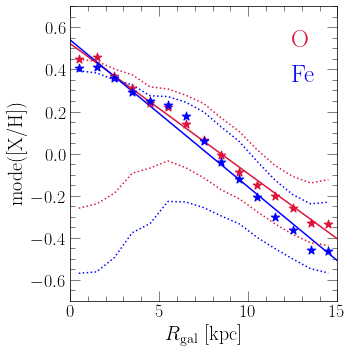

In [54]:
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111)
ax.set_xlabel(r"$R_\text{gal}$ [kpc]")
ax.set_ylabel(r"mode([X/H])")
ax.set_xlim([0, 15])
ax.set_ylim([-0.7, 0.7])

fitraw = np.genfromtxt("./paperfigures/gradient_fit.out")
rmin = fitraw[:,0]
rmax = fitraw[:,1]
oh_16th = fitraw[:,2]
oh_mode = fitraw[:,3]
oh_minuserr = fitraw[:,4]
oh_pluserr = fitraw[:,5]
oh_84th = fitraw[:,6]
feh_16th = fitraw[:,7]
feh_mode = fitraw[:,8]
feh_minuserr = fitraw[:,9]
feh_pluserr = fitraw[:,10]
feh_84th = fitraw[:,11]
radii = [(a + b) / 2 for a, b in zip(rmin, rmax)]

def chi_squared(radii, xh, regression):
    chisq = 0
    bestfit = line(regression.slope, regression.intercept)
    for i in range(len(radii)):
        expected = abs(bestfit(radii[i]))
        observed = abs(xh[i])
        chisq += (observed - expected)**2 / expected
#         x = (observed - expected)**2 / expected
#         print(observed, expected, x)
#         chisq += x
#     chisq /= (len(radii) - 2) # 2 degrees of freedom for a line
    return chisq

oh_regress = linregress(radii, oh_mode)
feh_regress = linregress(radii, feh_mode)

print("Oyxgen")
print("======")
print("Slope: %.3f +/- %.3f" % (oh_regress.slope, oh_regress.stderr))
print("Intercept: %.3f +/- %.3f" % (oh_regress.intercept, oh_regress.intercept_stderr))
print("chi^2: %.3f" % (chi_squared(radii, oh_mode, oh_regress)))
print("R^2: %.3f" % (oh_regress.rvalue**2))
print("p: %.3e" % (oh_regress.pvalue))
print("")
print("Iron")
print("======")
print("Slope: %.3f +/- %.3f" % (feh_regress.slope, feh_regress.stderr))
print("Intercept: %.3f +/- %.3f" % (feh_regress.intercept, feh_regress.intercept_stderr))
print("chi^2: %.3f" % (chi_squared(radii, feh_mode, feh_regress)))
print("R^2: %.3f" % (feh_regress.rvalue**2))
print("p: %.3e" % (feh_regress.pvalue))

kwargs = {
    "c": named_colors()["crimson"],
    "label": "O"
}
oh_grad = line(oh_regress.slope, oh_regress.intercept)
ax.plot(ax.get_xlim(), [oh_grad(_) for _ in ax.get_xlim()], **kwargs)
kwargs["c"] = named_colors()["blue"]
kwargs["label"] = "Fe"
feh_grad = line(feh_regress.slope, feh_regress.intercept)
ax.plot(ax.get_xlim(), [feh_grad(_) for _ in ax.get_xlim()], **kwargs)

kwargs = {
    "c": named_colors()["crimson"],
    "marker": markers()["star"],
    "s": 80,
    "zorder": 10
}
ax.scatter(radii, oh_mode, **kwargs)
kwargs["c"] = named_colors()["blue"]
ax.scatter(radii, feh_mode, **kwargs)

kwargs = {
    "c": named_colors()["crimson"],
    "linestyle": ':'
}
ax.plot(radii, oh_16th, **kwargs)
ax.plot(radii, oh_84th, **kwargs)
kwargs = {
    "c": named_colors()["blue"],
    "linestyle": ':'
}
ax.plot(radii, feh_16th, **kwargs)
ax.plot(radii, feh_84th, **kwargs)

kwargs = {
    "loc": mpl_loc("upper right"),
    "handlelength": 0,
    "fontsize": 25
}
leg = ax.legend(**kwargs)
fancy_legend(leg, ["crimson", "blue"])

plt.tight_layout()
plt.show()

In [18]:
def skewnormal(x, a, mean, std):
    return 1 / std * skewnorm.pdf((x - mean) / std, a)

# age_bins = list(range(0, 11, 2))
age_bins = list(range(11))
radial_bins = list(range(16))
midplane_sample = sample.filter(
    "GALZ", ">=", -0.5).filter(
    "GALZ", "<=", 0.5).filter(
    "O_H", ">=", -10).filter(
    "O_H", "<=", 10).filter(
    "FE_H", ">=", -10).filter(
    "FE_H", "<=", 10)
with open("./paperfigures/age_gradoh_skewnormfits.out", "w") as f_oh:
    with open("./paperfigures/age_gradfeh_skewnormfits.out", "w") as f_fe:
        for f in [f_oh, f_fe]:
            f.write("# age_min [Gyr]    age_max [Gyr]    ")
            f.write("r_min [Gyr]    r_max [Gyr]    ")
            f.write("xh_mode    xh_mode_minuserr    xh_mode_pluserr\n")
        for i in range(len(age_bins) - 1):
            subsample = midplane_sample.filter(
                "ASTRONN_AGE", ">=", age_bins[i]).filter(
                "ASTRONN_AGE", "<=", age_bins[i + 1])
            for j in range(len(radial_bins) - 1):
                for f in [f_oh, f_fe]: f.write("%.3e\t%.3e\t" % (age_bins[i], age_bins[i + 1]))
                for f in [f_oh, f_fe]: f.write("%.3e\t%.3e\t" % (radial_bins[j], radial_bins[j + 1]))
                sys.stdout.write("\rAge: %d - %d Gyr ; Radius: %d - %d kpc           " % (
                    age_bins[i], age_bins[i + 1], radial_bins[j], radial_bins[j + 1]))
                subsubsample = subsample.filter(
                    "GALR", ">=", radial_bins[j]).filter(
                    "GALR", "<=", radial_bins[j + 1])
                if len(subsubsample["O_H"]) > 200:
                    bins = np.linspace(-2, 2, 101)
                    mode_oh, minus_oh, plus_oh = skewnormal_mode_sample_bootstrap(subsubsample["O_H"])
                    f_oh.write("%.3e\t%.3e\t%.3e\t" % (mode_oh, minus_oh, plus_oh))
                    
                    mode_feh, minus_feh, plus_feh = skewnormal_mode_sample_bootstrap(subsubsample["FE_H"])
                    f_fe.write("%.3e\t%.3e\t%.3e\t" % (mode_feh, minus_feh, plus_feh))
                else:
                    for f in [f_oh, f_fe]:
                        for _ in range(3): f.write("nan\t")
                for f in [f_oh, f_fe]: f.write("\n")
        f_fe.close()
    f_oh.close()
    sys.stdout.write("\n")

Age: 9 - 10 Gyr ; Radius: 14 - 15 kpc           


Oxygen
Age: 0 - 1 Gyr
Slope: -0.055 +/- 0.011
Intercept: 0.459 +/- 0.103
chi^2: 0.583
----------------------
Age: 1 - 2 Gyr
Slope: -0.056 +/- 0.005
Intercept: 0.473 +/- 0.048
chi^2: 0.490
----------------------
Age: 2 - 3 Gyr
Slope: -0.059 +/- 0.005
Intercept: 0.497 +/- 0.052
chi^2: 0.902
----------------------
Age: 3 - 4 Gyr
Slope: -0.066 +/- 0.004
Intercept: 0.544 +/- 0.038
chi^2: 1.350
----------------------
Age: 4 - 5 Gyr
Slope: -0.079 +/- 0.004
Intercept: 0.662 +/- 0.037
chi^2: 0.440
----------------------
Age: 5 - 6 Gyr
Slope: -0.080 +/- 0.007
Intercept: 0.690 +/- 0.062
chi^2: 0.741
----------------------
Age: 6 - 7 Gyr
Slope: -0.055 +/- 0.008
Intercept: 0.515 +/- 0.062
chi^2: 1.798
----------------------
Age: 7 - 8 Gyr
Slope: -0.049 +/- 0.002
Intercept: 0.517 +/- 0.015
chi^2: 2.877
----------------------
Age: 8 - 9 Gyr
Slope: -0.049 +/- 0.007
Intercept: 0.498 +/- 0.047
chi^2: 2.263
----------------------
Age: 9 - 10 Gyr
Slope: -0.001 +/- 0.005
Intercept: 0.037 +/- 0.031
chi^2: 1

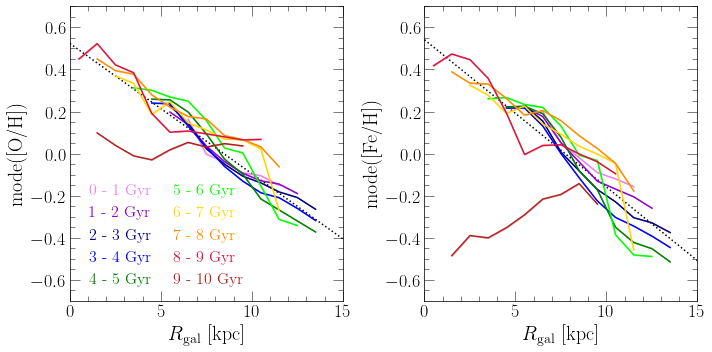

In [55]:
fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
for ax in [ax1, ax2]:
    ax.set_xlabel(r"$R_\text{gal}$ [kpc]")
    ax.set_xlim([0, 15])
    ax.set_ylim([-0.7, 0.7])
ax1.set_ylabel(r"mode([O/H])")
ax2.set_ylabel(r"mode([Fe/H])")
axes = [ax1, ax2]
random.seed(a = 1)

age_bins = list(range(11))
# age_bins = list(range(0, 11, 2))
radial_bins = list(range(16))
colors = ["violet", "darkviolet", "navy", "blue", "green", "lime", "gold", "darkorange", "crimson", "firebrick"]
# colors = ["darkviolet", "blue", "green", "darkorange", "crimson"]
# colors = ["purple", "blue", "lime", "crimson", "black"]

for i, regression in enumerate([oh_regress, feh_regress]):
    bestfit = line(regression.slope, regression.intercept)
    kwargs = {
        "c": named_colors()["black"],
        "linestyle": ":"
    }
    axes[i].plot(axes[i].get_xlim(), [bestfit(_) for _ in   axes[i].get_xlim()], **kwargs)

filenames = ["./paperfigures/age_gradoh_skewnormfits.out", "./paperfigures/age_gradfeh_skewnormfits.out"]
for ax_idx, file in enumerate(filenames):
    print(["Oxygen", "Iron"][ax_idx])
    print("===============")
    raw = np.genfromtxt(file)
    for i in range(len(age_bins) - 1):
        fits = raw[i * (len(radial_bins) - 1) : (i + 1) * (len(radial_bins) - 1)]
        radii = []
        xh = []
        xh_minus_err = []
        xh_plus_err = []
        for j in range(len(fits)):
            if not any([np.isnan(_) for _ in fits[j]]):
                radii.append((fits[j][2] + fits[j][3]) / 2)
                xh.append(fits[j][4])
                xh_minus_err.append(fits[j][5])
                xh_plus_err.append(fits[j][6])
            else: pass
        kwargs = {
            "c": named_colors()[colors[i]],
            "label": r"%d - %d Gyr" % (age_bins[i], age_bins[i + 1])
        }
        axes[ax_idx].plot(radii, xh, **kwargs)
        axes[ax_idx].fill_between(radii, [a - b for a, b in zip(xh, xh_minus_err)],
            [a + b for a, b in zip(xh, xh_plus_err)], alpha = 0.3, color = kwargs["c"])
        regression = linregress(radii, xh)
        print("Age: %d - %d Gyr" % (age_bins[i], age_bins[i + 1]))
        print("Slope: %.3f +/- %.3f" % (regression.slope, regression.stderr))
        print("Intercept: %.3f +/- %.3f" % (regression.intercept, regression.intercept_stderr))
        print("chi^2: %.3f" % (chi_squared(radii, xh, [oh_regress, feh_regress][ax_idx])))
        print("----------------------")
        
kwargs = {
    "loc": mpl_loc("lower left"),
    "ncol": 2,
    "handlelength": 0,
    "columnspacing": 1,
    "fontsize": 16
}
leg = axes[0].legend(**kwargs)
fancy_legend(leg, colors)

plt.tight_layout()
plt.savefig("./paperfigures/gradxh_fixedage.pdf")
plt.show()

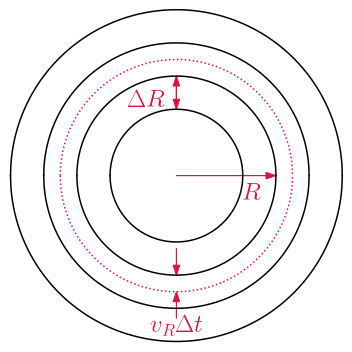

In [2]:
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111)
ax.set_xlim([-5.1, 5.1])
ax.set_ylim([-5.1, 5.1])
ax.axis("off")

def plot_circle(radius, **kwargs):
    xvals = np.linspace(-radius, radius, 1000)
    yvals = [np.sqrt(radius**2 - x**2) for x in xvals]
    ax.plot(xvals, yvals, **kwargs)
    yvals = [-np.sqrt(radius**2 - x**2) for x in xvals]
    ax.plot(xvals, yvals, **kwargs)

kwargs = {"c": named_colors()["black"]}
for _ in [2, 3, 4, 5]: plot_circle(_, **kwargs)
plot_circle(3.5, c = named_colors()["crimson"], linestyle = ':')
kwargs = {
    "color": named_colors()["crimson"],
    "length_includes_head": True,
    "head_width": 0.2
}
ax.arrow(0, 0, 3, 0, **kwargs)
ax.arrow(0, 2, 0, 1, **kwargs)
ax.arrow(0, 3, 0, -1, **kwargs)
ax.arrow(0, -4.3, 0, 0.8, **kwargs)
ax.arrow(0, -2.2, 0, -0.8, **kwargs)
ax.text(-1.5, 2.1, r"$\Delta R$", color = kwargs["color"], fontsize = 25)
ax.text(2, -0.7, r"$R$", color = kwargs["color"], fontsize = 25)
ax.text(-0.8, -4.7, r"$v_R \Delta t$", color = kwargs["color"], fontsize = 25)

plt.tight_layout()
plt.savefig("../paper/figures/radialflows_schematic.pdf")
plt.show()

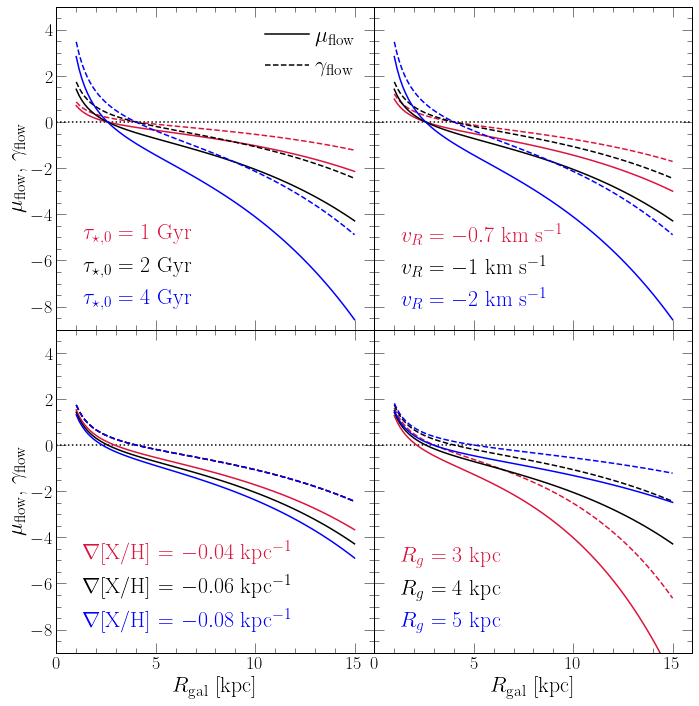

In [6]:
_SECONDS_PER_GYR_ = 3.1536e16
_KM_PER_KPC_ = 3.24e-17

def ralpha(A):
    r"""
    The e-folding scale radius of the metallicity gradient by mass.
    
    See :math:`R_\alpha` in notes above.
    """
    return -1 / (A * np.log(10))

def mu_flow(taustar, vr, A, rg, R):
    vr *= _SECONDS_PER_GYR_
    vr *= _KM_PER_KPC_ # vr now in kpc / Gyr
    return -taustar * vr * (1 / R - 1 / rg - 1 / ralpha(A))

def gamma_flow(taustar, vr, rg, R):
    vr *= _SECONDS_PER_GYR_
    vr *= _KM_PER_KPC_
    return -taustar * vr * (1 / R - 1 / rg)

def tau_star(radius, taustar0 = 2, Rg = 4, N = 1.5):
    return taustar0 * np.exp((N - 1) * radius / Rg)

fig = plt.figure(figsize = (10, 10))
axes = []
for i in range(4):
    kwargs = {}
    if i: kwargs["sharey"] = axes[0]
    axes.append(fig.add_subplot(221 + i, **kwargs))
    if i == 0 or i == 2:
#         axes[i].set_ylabel(r"$\mu_\text{flow} \equiv \dot{M}_{\alpha,\text{flow}} / \dot{M}_\star$",
#             fontsize = 22)
        axes[i].set_ylabel(r"$\mu_\text{flow}$, $\gamma_\text{flow}$", fontsize = 22)
    else:
        plt.setp(axes[i].get_yticklabels(), visible = False)
    if i >= 2:
        axes[i].set_xlabel(r"$R_\text{gal}$ [kpc]", fontsize = 22)
    else:
        plt.setp(axes[i].get_xticklabels(), visible = False)
    axes[i].set_xlim([0, 16])
    axes[i].set_ylim([-9, 5])
    axes[i].axhline(0, c = named_colors()["black"], linestyle = ':')
    
kwargs = {
    "c": named_colors()["black"],
    "label": r"$\mu_\text{flow}$"
}
line1 = axes[0].plot([-10, -20], [-10, -20], **kwargs)[0]
kwargs["linestyle"] = "--"
kwargs["label"] = r"$\gamma_\text{flow}$"
line2 = axes[0].plot([-10, -20], [-10, -20], **kwargs)[0]
kwargs = {
    "loc": mpl_loc("upper right"),
    "fontsize": 22
}
leg = axes[0].legend(**kwargs)
axes[0].add_artist(leg)
line1.remove()
line2.remove()

colors = ["crimson", "black", "blue"]
taustar0 = [1, 2, 4]
vr = [-0.7, -1, -2]
A = [-0.04, -0.06, -0.08]
rg = [3, 4, 5]

xvals = np.linspace(1, 15, 100)

for i in range(3):
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": r"$\tau_{\star,0} = %g$ Gyr" % (taustar0[i])
    }
#     yvals = [mu_flow(taustar[i], vr[1], A[1], rg[1], x) for x in xvals]
    yvals = [mu_flow(tau_star(x, taustar0 = taustar0[i]), vr[1], A[1], rg[1], x) for x in xvals]
    axes[0].plot(xvals, yvals, **kwargs)
    kwargs["linestyle"] = "--"
    kwargs["label"] = None
    yvals = [gamma_flow(tau_star(x, taustar0 = taustar0[i]), vr[1], rg[1], x) for x in xvals]
    axes[0].plot(xvals, yvals, **kwargs)
    
for i in range(3):
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": r"$v_R = %g$ km s$^{-1}$" % (vr[i])
    }
#     yvals = [mu_flow(taustar[1], vr[i], A[1], rg[1], x) for x in xvals]
    yvals = [mu_flow(tau_star(x, taustar0 = taustar0[1]), vr[i], A[1], rg[1], x) for x in xvals]
    axes[1].plot(xvals, yvals, **kwargs)
    kwargs["linestyle"] = "--"
    kwargs["label"] = None
    yvals = [gamma_flow(tau_star(x, taustar0 = taustar0[1]), vr[i], rg[1], x) for x in xvals]
    axes[1].plot(xvals, yvals, **kwargs)
    
for i in range(3):
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": r"$\nabla$[X/H] = $%g$ kpc$^{-1}$" % (A[i])
    }
#     yvals = [mu_flow(taustar[1], vr[1], A[i], rg[1], x) for x in xvals]
    yvals = [mu_flow(tau_star(x, taustar0 = taustar0[1]), vr[1], A[i], rg[1], x) for x in xvals]
    axes[2].plot(xvals, yvals, **kwargs)
    kwargs["linestyle"] = "--"
    kwargs["label"] = None
    yvals = [gamma_flow(tau_star(x, taustar0 = taustar0[1]), vr[1], rg[1], x) for x in xvals]
    axes[2].plot(xvals, yvals, **kwargs)

for i in range(3):
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": r"$R_g = %g$ kpc" % (rg[i])
    }
#     yvals = [mu_flow(taustar[1], vr[1], A[1], rg[i], x) for x in xvals]
    yvals = [mu_flow(tau_star(x, taustar0 = taustar0[1], Rg = rg[i]), vr[1], A[1], rg[i], x) for x in xvals]
    axes[3].plot(xvals, yvals, **kwargs)
    kwargs["linestyle"] = "--"
    kwargs["label"] = None
    yvals = [gamma_flow(tau_star(x, taustar0 = taustar0[1], Rg = rg[i]), vr[1], rg[i], x) for x in xvals]
    axes[3].plot(xvals, yvals, **kwargs)

for i in range(4):
    kwargs = {
        "loc": mpl_loc("lower left"),
        "handlelength": 0,
        "fontsize": 22
    }
    leg = axes[i].legend(**kwargs)
    fancy_legend(leg, colors)

plt.tight_layout()
plt.subplots_adjust(hspace = 0, wspace = 0)
plt.savefig("../paper/figures/muflow_gammaflow_vs_radius.pdf")
plt.show()